## Data from Beer Reviews

*Data*: BeerAdvocate / RateBeer / matched_beer_data

*Difference ratings-reviews*: **reviews.txt** semble être un sous-ensemble de **ratings.txt** car ce dernier a en plus la colonne review (True or False) et **reviews.txt** est l'ensemble de tous les ratings qui sont True

*Ligne to print .txt*: 
* """with open(BA_REVIEWS_DATASET, 'r', encoding='utf-8') as file:
    for _ in range(16):
        print(file.readline())"""
* """with open(BA_RATINGS_DATASET, 'r', encoding='utf-8') as file:
    for _ in range(17):
        print(file.readline())"""
* !head Data/BeerAdvocate/ratings.txt/ratings.txt

# BeerAdvocate

**beers.csv**
* beer_id
* beer_name
* brewery_id
* brewery_name
* style
* nbr_ratings
* nbr_reviews
* avg
* ba_score
* bros_score
* abv
* avg_computed
* zscore
* nbr_matched_valid_ratings
* avg_matched_valid_ratings

**breweries.csv**
* id,
* location
* name
* nbr_beers

**users.csv**
* nbr_ratings
* nbr_reviews
* user_id
* user_name
* joined
* location

**ratings.txt** (format ligne i.e. Header=None)
* beer_name
* beer_id
* brewery_name
* brewery_id
* style
* abv
* date
* user_name
* user_id
* appearance
* aroma
* palate
* taste
* overall
* rating
* text
* review: *True or False*

**reviews.txt** (format ligne i.e. Header=None, sous-ensemble de **ratings.txt**)
* beer_name
* beer_id
* brewery_name
* brewery_id
* style
* abv
* date
* user_name
* user_id
* appearance : *up to 5*
* aroma : *up to 5*
* palate : *up to 5*
* taste : *up to 5*
* overall : *up to 5*
* rating : *up to 5, unkown formula but different weights for each parameter*
* text

----------------------------------------------------------------------------------------------------

# RateBeer

*Appearance and Mouthfeel (= Palate) are each scored out of 5. Aroma and Taste are scored out of 10. While Overall is scored out of 20. These all combine to give the beer a total score out of 50, which is then divided and displayed as a score out of 5 for each rating.*

**beers.csv**
* beer_id
* beer_name
* brewery_id
* brewery_name
* style
* nbr_ratings
* overall_score
* style_score
* avg
* abv
* avg_computed
* zscore
* nbr_matched_valid_ratings
* avg_matched_valid_ratings

**breweries.csv**
* id
* location
* name
* nbr_beers

**users.csv**
* nbr_ratings
* user_id
* user_name
* joined
* location

**ratings.txt = reviews.txt** (format ligne i.e. Header=None)
* beer_name
* beer_id
* brewery_name
* brewery_id
* style
* abv
* date
* user_name
* user_id
* appearance : *up to 5*
* aroma : *up to 10*
* palate (=mouthfeel) : *up to 5*
* taste : *up to 10*
* overall : *up to 20*
* rating : *up to 50 (sum of all previous) then divided by 10 --> up to 5*
* text

----------------------------------------------------------------------------------------------------

# matched_beer_data

**beers.csv**
### ba:
* abv
* avg
* avg_computed
* avg_matched_valid_ratings
* ba_score
* beer_id
* beer_name
* beer_wout_brewery_name
* brewery_id
* brewery_name
* bros_score
* nbr_matched_valid_ratings
* nbr_ratings
* nbr_reviews
* style
* zscore
### rb:
* abv
* avg
* avg_computed
* avg_matched_valid_ratings
* beer_id
* beer_name
* beer_wout_brewery_name
* brewery_id
* brewery_name
* nbr_matched_valid_ratings
* nbr_ratings
* overall_score
* style
* style_score
* zscore
### scores:
* diff
* sim

**breweries.csv**
### ba:
* id
* location
* name
* nbr_beers
### rb:
* id
* location
* name
* nbr_beers
### scores:
* diff
* sim

**ratings.csv**
### ba:
* abv
* appearance
* aroma
* beer_id
* beer_name
* brewery_id
* brewery_name
* date
* overall
* palate
* rating
* review
* style
* taste
* text
* user_id
* user_name
### rb:
* abv
* appearance
* aroma
* beer_id
* beer_name
* brewery_id
* brewery_name
* date
* overall
* palate
* rating
* style
* taste
* text
* user_id
* user_name


**users_approx.csv**
### ba:
* joined
* location
* nbr_ratings
* nbr_reviews
* user_id
* user_name
* user_name_lower
### rb:
* joined
* location
* nbr_ratings
* user_id
* user_name
* user_name_lower
### scores:
* sim

**users.csv**
### ba:
* joined
* location
* nbr_ratings
* nbr_reviews
* user_id
* user_name
* user_name_lower
### rb:
* joined
* location
* nbr_ratings
* user_id
* user_name
* user_name_lower

----------------------------------------------------------------------------------------------------

# Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
DATA_FOLDER = 'F:\\9_COURS_EPFL_MA1\\4_ADA\\ada-2024-project-bada55\\data\\'
BEER_ADVOCATE_FOLDER = DATA_FOLDER + 'BeerAdvocate/' #BA
RATE_BEER_FOLDER = DATA_FOLDER + 'RateBeer/' #RB
MATCHED_BEER = DATA_FOLDER + 'matched_beer_data/' #MB

BA_BEERS_DATASET = BEER_ADVOCATE_FOLDER + "beers.csv"
BA_BREWERIES_DATASET = BEER_ADVOCATE_FOLDER + "breweries.csv"
BA_USERS_DATASET = BEER_ADVOCATE_FOLDER + "users.csv"
BA_RATINGS_DATASET = BEER_ADVOCATE_FOLDER + "ratings.txt"
BA_REVIEWS_DATASET = BEER_ADVOCATE_FOLDER + "reviews.txt"

RB_BEERS_DATASET = RATE_BEER_FOLDER + "beers.csv"
RB_BREWERIES_DATASET = RATE_BEER_FOLDER + "breweries.csv"
RB_USERS_DATASET = RATE_BEER_FOLDER + "users.csv"
RB_RATINGS_DATASET = RATE_BEER_FOLDER + "ratings.txt"
RB_REVIEWS_DATASET = RATE_BEER_FOLDER + "ratings.txt"

### Beer Advocate

ratings.txt != reviews.txt

ratings :
[151 074 576 lines = 151 074 576/18 reviews = 8 393 032 reviews]

reviews :
[4 4022 962 lines = 44022962/17 reviews = 2 589 586 reviews]

In [6]:
with open(BA_RATINGS_DATASET, 'r', encoding='utf-8') as file:
    line_count = sum(1 for line in file)

print(f"Number of lines: {line_count}")

Number of lines: 151074576


In [7]:
columns = ['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv', 'date', 
           'user_name', 'user_id', 'appearance', 'aroma', 'palate', 'taste', 'overall', 
           'rating', 'text']
data = []
current_entry = {}

max_entries = 10000 #must be equal 2 589 586 to have all reviews
entry_count = 0

with open(BA_REVIEWS_DATASET, 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()  # Supprimer les espaces de début/fin
        if line:  # Si la ligne n'est pas vide
            if ':' in line:
                key, value = line.split(':', 1)  # Séparer la clé et la valeur
                key = key.strip()
                value = value.strip()
                current_entry[key] = value
        else:
            if current_entry:  # Si un bloc est terminé, ajouter l'entrée au dataset
                data.append(current_entry)
                current_entry = {}  # Réinitialiser pour le prochain bloc
                entry_count += 1
                if entry_count >= max_entries:  # Arrêter après 40 entrées
                    break

# Ajouter la dernière entrée si nécessaire et si le fichier ne finit pas par une ligne vide
if current_entry and entry_count < max_entries:
    data.append(current_entry)

ba_reviews = pd.DataFrame(data, columns=columns)
ba_reviews["date"] = pd.to_numeric(ba_reviews["date"])
ba_reviews["date"] = pd.to_datetime(ba_reviews["date"], unit='s').dt.strftime('%d/%m/%Y')
cols = ['appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']
ba_reviews[cols] = ba_reviews[cols].apply(pd.to_numeric, errors = 'coerce')

In [8]:
ba_beers = pd.read_csv(BA_BEERS_DATASET)
ba_breweries = pd.read_csv(BA_BREWERIES_DATASET)
ba_users = pd.read_csv(BA_USERS_DATASET)

### Rate Beer

ratings.txt = reviews.txt (i.e. no difference for this dataset)

[121 075 258 lines = 121075258/17 reviews = 7 122 074 review]

In [9]:
columns = ['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv', 'date', 
           'user_name', 'user_id', 'appearance', 'aroma', 'palate', 'taste', 'overall', 
           'rating', 'text']
data = []
current_entry = {}

max_entries = 10000 #must be equal 7 122 074 to have all reviews
entry_count = 0

with open(RB_REVIEWS_DATASET, 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()  # Supprimer les espaces de début/fin
        if line:  # Si la ligne n'est pas vide
            if ':' in line:
                key, value = line.split(':', 1)  # Séparer la clé et la valeur
                key = key.strip()
                value = value.strip()
                current_entry[key] = value
        else:
            if current_entry:  # Si un bloc est terminé, ajouter l'entrée au dataset
                data.append(current_entry)
                current_entry = {}  # Réinitialiser pour le prochain bloc
                entry_count += 1
                if entry_count >= max_entries:  # Arrêter après 40 entrées
                    break

# Ajouter la dernière entrée si nécessaire et si le fichier ne finit pas par une ligne vide
if current_entry and entry_count < max_entries:
    data.append(current_entry)

rb_reviews = pd.DataFrame(data, columns=columns)
rb_reviews["date"] = pd.to_numeric(rb_reviews["date"])
rb_reviews["date"] = pd.to_datetime(rb_reviews["date"], unit='s').dt.strftime('%d/%m/%Y')
cols = ['appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']
rb_reviews[cols] = rb_reviews[cols].apply(pd.to_numeric)

In [10]:
rb_beers = pd.read_csv(RB_BEERS_DATASET)
rb_breweries = pd.read_csv(RB_BREWERIES_DATASET)
rb_users = pd.read_csv(RB_USERS_DATASET)

# Tendencies : BeerAdvocate

## Display :

In [8]:
print("ba_beers :\n")
display(ba_beers)
print("=" * 150)
print("\nba_beweries :\n")
display(ba_breweries)
print("=" * 150)
print("\nba_users :\n")
display(ba_users)
print("=" * 150)
print("\nba_reviews :\n")
display(ba_reviews)

ba_beers :



,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280818,19139,Kölsch Ale,885,Summit Station Restaurant & Brewery,Kölsch,3,3,2.71,NaN,NaN,5.0,2.713333,NaN,0,NaN
280819,19140,Nut Brown Ale,885,Summit Station Restaurant & Brewery,English Brown Ale,2,1,3.10,NaN,NaN,5.3,3.250000,NaN,0,NaN
280820,19146,Octoberfest,885,Summit Station Restaurant & Brewery,Märzen / Oktoberfest,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
280821,2805,Scotch Ale,885,Summit Station Restaurant & Brewery,Scotch Ale / Wee Heavy,0,0,NaN,NaN,NaN,7.0,NaN,NaN,0,NaN



ba_beweries :



,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2
...,...,...,...,...
16753,128,Germany,Privatbrauerei Franz Joseph Sailer,6
16754,5023,Aruba,Aruba Brewing,0
16755,1573,"United States, New York",John Harvard’s Brewery & Ale House,491
16756,16186,"United States, North Carolina",Triangle Brewing Company,20



ba_users :



,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland
...,...,...,...,...,...,...
153699,1,1,everman.532342,Everman,1.291115e+09,"United States, California"
153700,1,1,justin0001.352175,Justin0001,1.248343e+09,"United States, California"
153701,1,0,kyungsup.982216,Kyungsup,1.430561e+09,NaN
153702,1,1,joetex.800347,JoeTex,1.400234e+09,"United States, California"



ba_reviews :



,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,20/08/2015,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ..."
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,20/02/2009,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,13/03/2006,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim....."
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,01/12/2004,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,30/08/2004,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Traquair House Ale,36,Traquair House Brewery Lld,24,Scotch Ale / Wee Heavy,7.2,14/06/2007,mmmbeer,mmmbeer.13029,4.00,5.00,4.00,4.50,4.5,4.54,"330 mL bottle, served in my Paceña glass. It p..."
9996,Traquair House Ale,36,Traquair House Brewery Lld,24,Scotch Ale / Wee Heavy,7.2,10/06/2007,blakesell,blakesell.38323,4.50,4.00,4.00,4.50,2.0,3.83,Poured from 12oz bottle to tasting glassAppear...
9997,Traquair House Ale,36,Traquair House Brewery Lld,24,Scotch Ale / Wee Heavy,7.2,03/06/2007,Wasatch,wasatch.23172,4.00,4.00,4.00,4.00,4.0,4.00,Poured into a chalice a nice clean/clear dark ...
9998,Traquair House Ale,36,Traquair House Brewery Lld,24,Scotch Ale / Wee Heavy,7.2,27/05/2007,BlindPig,blindpig.81306,4.50,4.00,4.50,4.50,4.5,4.38,A- Thin light tan head on a really dark body (...


## ba_beers

## ba_breweries

## ba_users

## ba_reviews

# Tendencies : Rate Beer

## Display :

In [9]:
print("rb_beers :\n")
display(rb_beers)
print("=" * 150)
print("\nrb_beweries :\n")
display(rb_breweries)
print("=" * 150)
print("\nrb_users :\n")
display(rb_users)
print("=" * 150)
print("\nrb_reviews :\n")
display(rb_reviews)

rb_beers :



,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442076,189684,Stela Selekt,1107,Stefani & Co,Pilsener,5,NaN,NaN,2.19,4.7,1.500000,NaN,0,NaN
442077,84884,Hotel Martini Donauer,9355,Hotel Martini,Pale Lager,1,NaN,NaN,2.77,NaN,2.900000,NaN,0,NaN
442078,93783,Birra Rozafa,9928,Rozafa Brewery,Pale Lager,1,NaN,NaN,2.64,NaN,2.000000,NaN,0,NaN
442079,220897,Svejk Blonde,17155,Svejk Beer Garden,Pale Lager,4,NaN,NaN,2.70,NaN,2.500000,NaN,0,NaN



rb_beweries :



,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3
...,...,...,...,...
24184,28180,Albania,Shoqeria Picana,1
24185,1107,Albania,Stefani & Co,11
24186,9355,Albania,Hotel Martini,1
24187,9928,Albania,Rozafa Brewery,1



rb_users :



,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany
...,...,...,...,...,...
70169,1,134893,stamfordbus,1.315217e+09,England
70170,1,327816,fobia405,1.406282e+09,Belgium
70171,1,183139,junkin,1.339841e+09,NaN
70172,3,82020,klesidra,1.222250e+09,Slovenia



rb_reviews :



,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,26/04/2016,Manslow,175852,2,4,2,4,8,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,17/02/2017,MAGICuenca91,442761,2,3,2,4,8,1.9,Cerveza pale lager gabonesa. MÃ¡s floja que la...
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,24/06/2016,Sibarh,288889,3,3,2,3,5,1.6,"Kolor- złoty, klarowny. Piana - drobna, średni..."
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,01/01/2016,fombe89,250510,4,3,1,2,5,1.5,"Botella, de GabÃ³n regalo familiar.31/01/2015C..."
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,23/10/2015,kevnic2008,122778,2,4,2,4,7,1.9,Many thanks for this beer to Erzengel. Pours l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Amoy Bräu Black Moon 11%,335427,FatFat Beer Horse 胖胖啤酒马,21107,Imperial Stout,11.0,06/05/2016,GuideDogSaint,53015,4,8,4,8,15,3.9,On tap at Daxue Lu on 18 Nov 2015. Pours black...
9996,Amoy Bräu Cascade Pale Ale,293141,FatFat Beer Horse 胖胖啤酒马,21107,American Pale Ale,6.0,14/10/2014,GuideDogSaint,53015,3,6,3,6,12,3.0,On tap at the brew house on 11 Oct. Pours hazy...
9997,Amoy Bräu Citra Pale Ale,339181,FatFat Beer Horse 胖胖啤酒马,21107,American Pale Ale,6.5,08/06/2015,GuideDogSaint,53015,4,7,4,8,14,3.7,On tap at the Daxue Lu bar on 3 June. Pours ha...
9998,Amoy Bräu East Kent Goldings Pale Ale,313857,FatFat Beer Horse 胖胖啤酒马,21107,American Pale Ale,6.5,07/02/2015,GuideDogSaint,53015,4,7,4,7,14,3.6,"On tap at Amoy Brau, ZCA. Pours hazy golden wi..."


## rb_beers

beer_id : Identifiant unique pour chaque bière dans le dataset RateBeer.\
beer_name : Nom de la bière.\
brewery_id : Identifiant unique pour chaque brasserie associée à la bière.\
brewery_name : Nom de la brasserie qui produit la bière.\
style : Style de la bière (par exemple, Pale Lager, Stout, Pilsener), indiquant le type ou la catégorie de la bière.\
nbr_ratings : Nombre total de notes reçues pour cette bière.\
overall_score : Score global de la bière, basé sur la moyenne de toutes les évaluations des utilisateurs (peut être exprimé sur une échelle de 0 à 100).\
style_score : Score de la bière spécifique à son style (comparée aux autres bières du même type).\
avg : -\
abv : Teneur en alcool par volume (ABV) de la bière, exprimée en pourcentage.\
avg_computed : Note moyenne de la bière, i.e. moyenne des ratings (note disponible sur le site arrondi à 2 chiffres après la virgule), *appelons le rating*\
zscore : -\
nbr_matched_valid_ratings : **Nombre de notes "valides" pour cette bière dans les données croisées (par exemple, lorsqu'on compare avec un autre dataset comme BeerAdvocate).**\
avg_matched_valid_ratings : **Moyenne des notes "valides" pour cette bière dans les données croisées.**\
**gras = pas sûr**

In [10]:
display(rb_beers)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442076,189684,Stela Selekt,1107,Stefani & Co,Pilsener,5,NaN,NaN,2.19,4.7,1.500000,NaN,0,NaN
442077,84884,Hotel Martini Donauer,9355,Hotel Martini,Pale Lager,1,NaN,NaN,2.77,NaN,2.900000,NaN,0,NaN
442078,93783,Birra Rozafa,9928,Rozafa Brewery,Pale Lager,1,NaN,NaN,2.64,NaN,2.000000,NaN,0,NaN
442079,220897,Svejk Blonde,17155,Svejk Beer Garden,Pale Lager,4,NaN,NaN,2.70,NaN,2.500000,NaN,0,NaN


In [11]:
unique_style = rb_beers.groupby('style').agg(nbr_beers= ('beer_id', 'count'),
                                             nbr_ratings_sum= ('nbr_ratings', 'sum'),
                                             nbr_ratings_mean= ('nbr_ratings', 'mean'),
                                             overall_score_mean= ('overall_score', 'mean'),
                                             style_score_mean= ('style_score', 'mean'),
                                             avg_mean= ('avg', 'mean'),
                                             abv_mean= ('abv', 'mean'),
                                             avg_computed_mean= ('avg_computed', 'mean')).reset_index()
display(unique_style)

,style,nbr_beers,nbr_ratings_sum,nbr_ratings_mean,overall_score_mean,style_score_mean,avg_mean,abv_mean,avg_computed_mean
0,Abbey Dubbel,3004,71944,23.949401,58.072780,53.430859,3.041823,7.323595,3.297268
1,Abbey Tripel,3905,116602,29.859667,63.430689,54.256321,3.106314,8.817297,3.350143
2,Abt/Quadrupel,1565,66277,42.349521,82.398747,54.540710,3.245603,10.651311,3.566131
3,Altbier,2094,29403,14.041547,50.379717,55.570755,2.987792,5.491802,3.199474
4,Amber Ale,11664,138788,11.898834,45.494697,56.181162,2.966306,5.515832,3.143169
...,...,...,...,...,...,...,...,...,...
89,Traditional Ale,1894,36442,19.240760,46.704545,52.926573,2.973348,5.606781,3.131562
90,Weizen Bock,1586,32605,20.558008,65.340230,54.360920,3.094164,7.468877,3.358549
91,Wheat Ale,7234,78242,10.815870,43.331621,59.139398,2.943141,5.215630,3.117615
92,Witbier,6514,107243,16.463463,45.470946,55.807432,2.974411,5.171283,3.139028


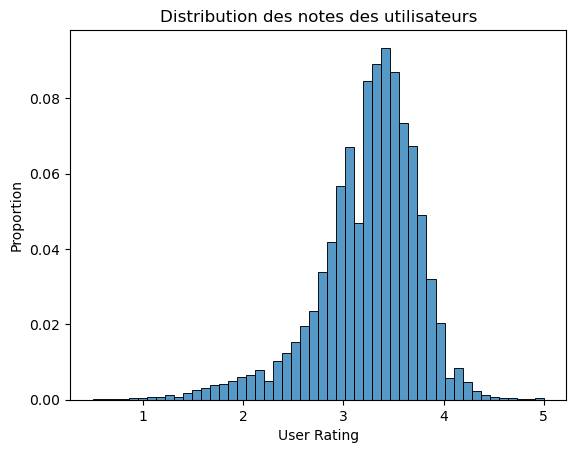

In [12]:
sns.histplot(rb_beers['avg_computed'], bins= 50, stat= 'proportion')
plt.title('Distribution des notes des utilisateurs')
plt.xlabel('User Rating')
plt.ylabel('Proportion')
plt.show()

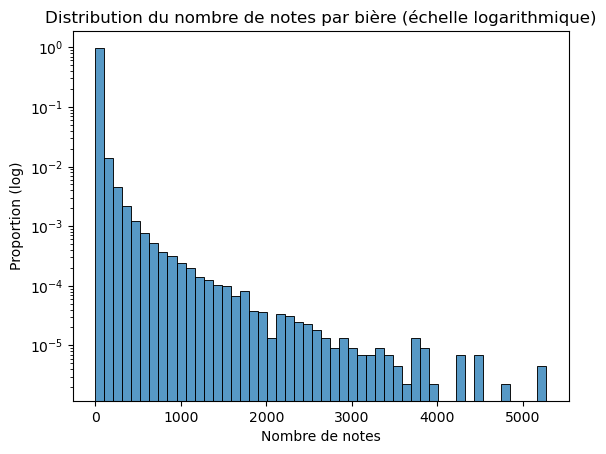

In [13]:
sns.histplot(rb_beers['nbr_ratings'], bins= 50, stat= 'proportion')
plt.yscale('log')
plt.title('Distribution du nombre de notes par bière (échelle logarithmique)')
plt.xlabel("Nombre de notes")
plt.ylabel('Proportion (log)')
plt.show()

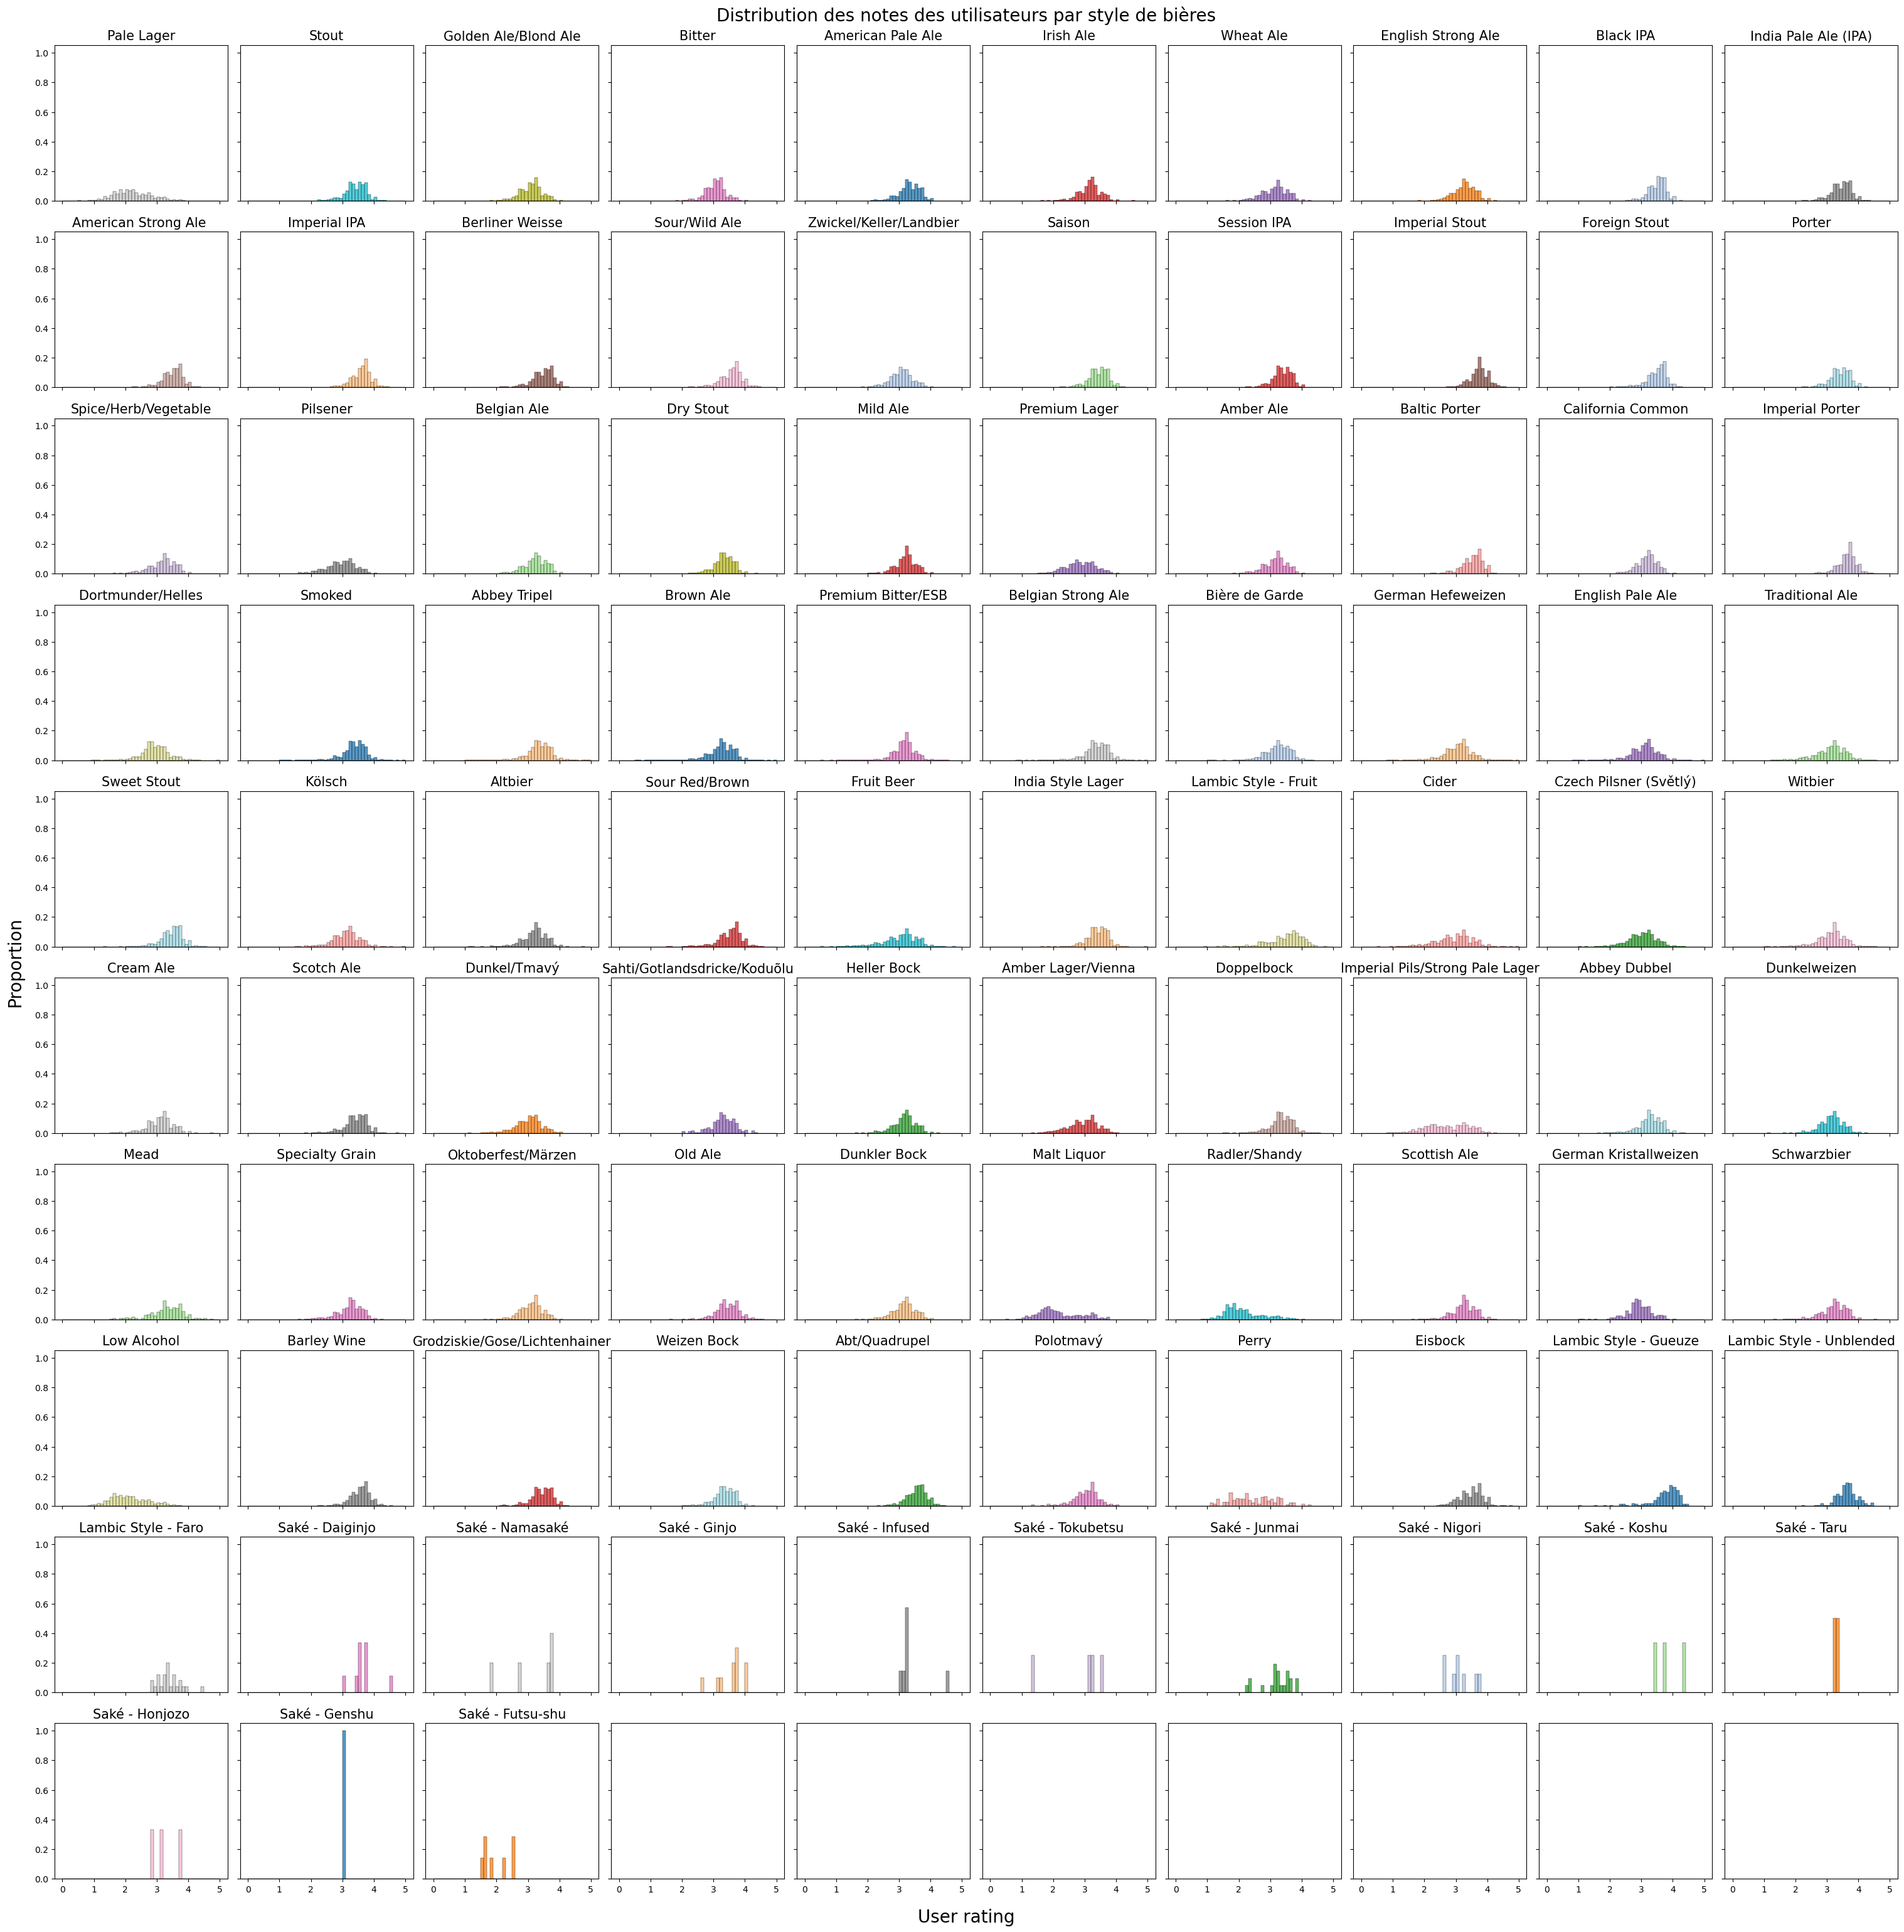

In [14]:
fig, axs = plt.subplots(10, 10, figsize=(30, 30), sharex=True, sharey=True)
cmap = plt.get_cmap('tab20')
i, j = 0, 0

for idx, name in enumerate(rb_beers['style'].unique()):
    if j == 10:
        i += 1
        j = 0
    
    style_data = rb_beers[rb_beers['style'] == name]['avg_computed'].dropna()
    color = cmap(np.random.rand())

    if not style_data.empty:
        sns.histplot(style_data, bins= 50, binrange= [0, 5], ax= axs[i, j], stat= 'proportion', color= color)
        axs[i, j].set_title(name, fontsize= 15)
        axs[i, j].set_xlabel('')
        axs[i, j].set_ylabel('')
    
    j += 1

fig.text(0.5, -0.01, 'User rating', ha= 'center', fontsize= 20)
fig.text(-0.01, 0.5, 'Proportion', va= 'center', rotation= 'vertical', fontsize= 20)
fig.text(0.5, 1, 'Distribution des notes des utilisateurs par style de bières', ha= 'center', fontsize= 20)

plt.tight_layout()
plt.show()

C:\Users\leroy\AppData\Local\Temp\ipykernel_9776\151376531.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= rb_beers, x= 'avg_computed', y= 'style', palette= 'coolwarm', order= sorted_styles)


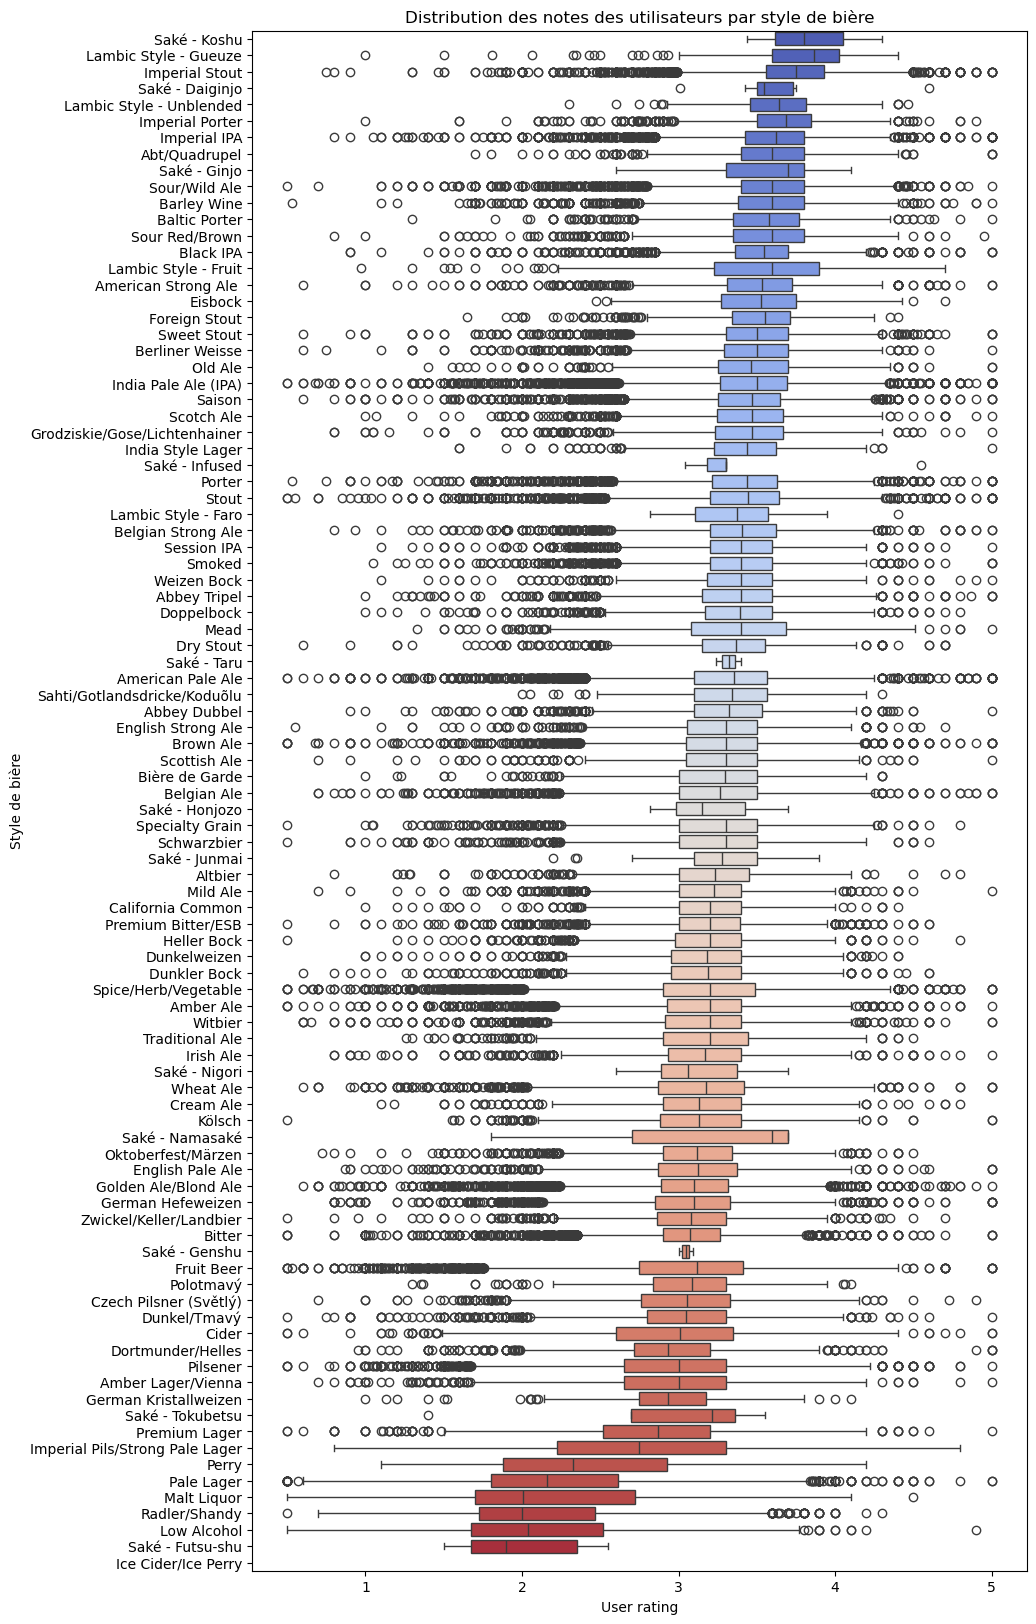

In [15]:
plt.figure(figsize= (10, 20))
sorted_styles = rb_beers.groupby('style')['avg_computed'].mean().sort_values(ascending= False).index
sns.boxplot(data= rb_beers, x= 'avg_computed', y= 'style', palette= 'coolwarm', order= sorted_styles)
plt.title('Distribution des notes des utilisateurs par style de bière')
plt.xlabel('User rating')
plt.ylabel('Style de bière')
plt.show()

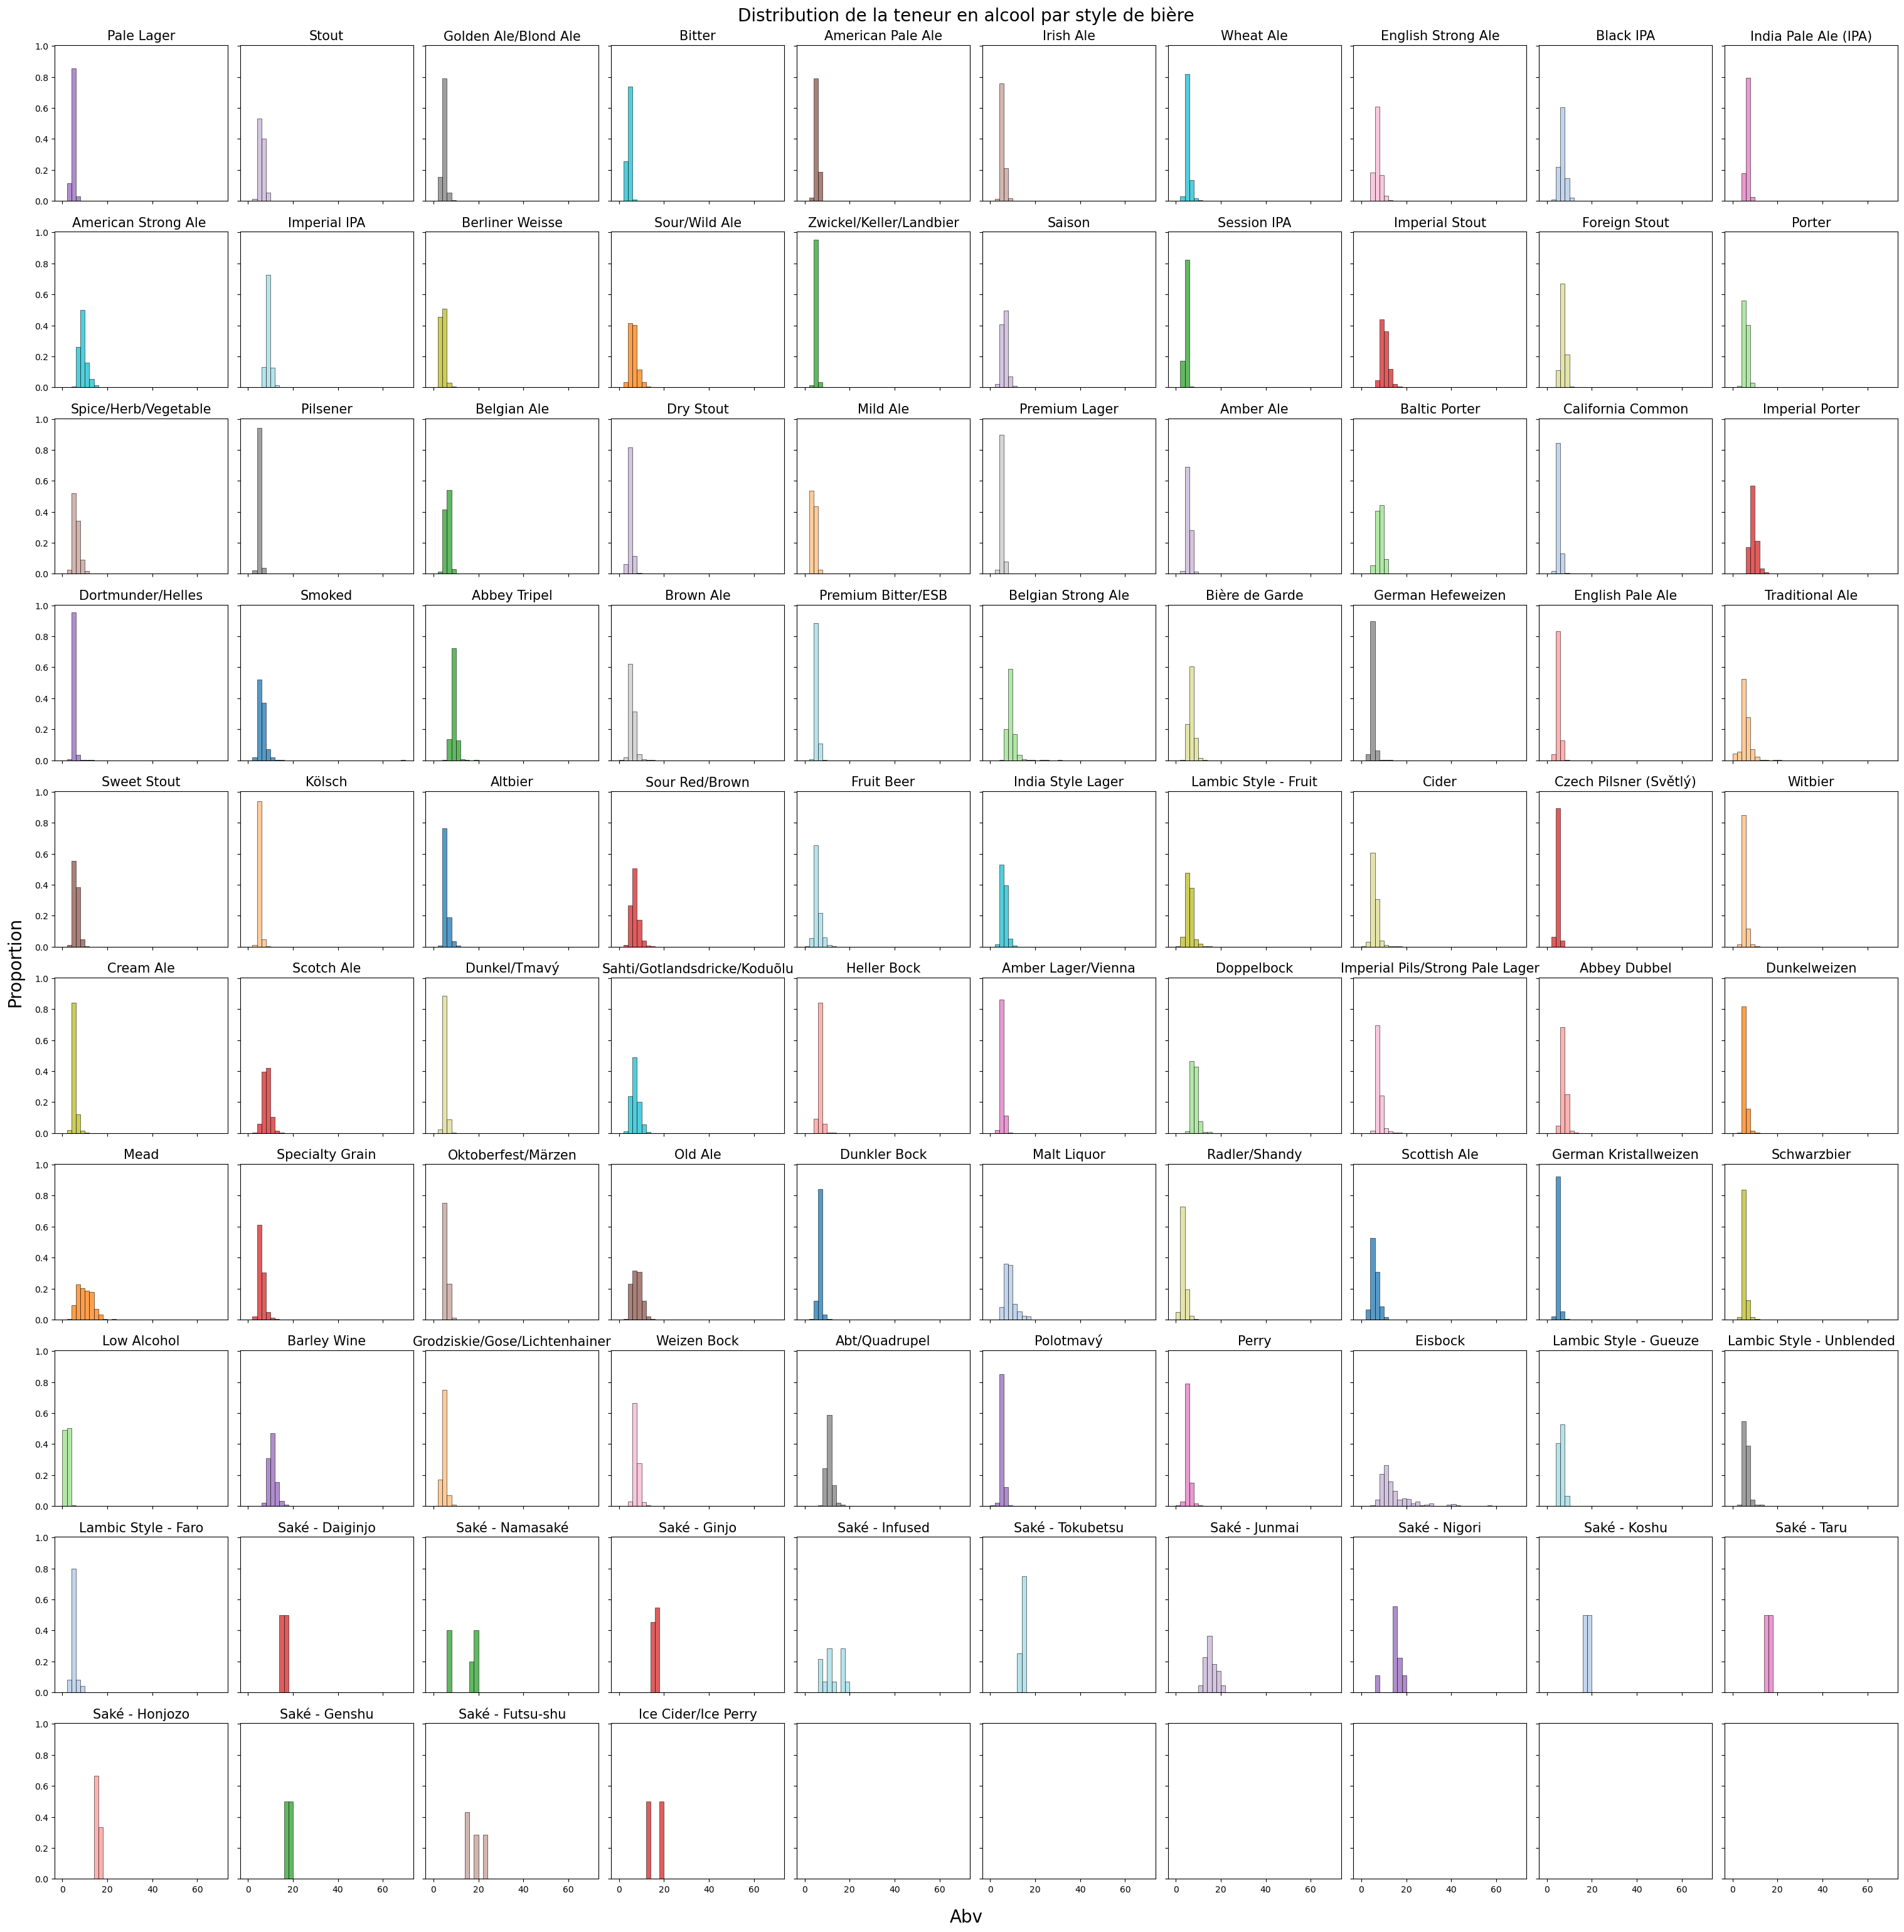

In [16]:
fig, axs = plt.subplots(10, 10, figsize=(30, 30), sharex=True, sharey=True)
cmap = plt.get_cmap('tab20')
i, j = 0, 0

for idx, name in enumerate(rb_beers['style'].unique()):
    if j == 10:
        i += 1
        j = 0
    
    style_data = rb_beers[rb_beers['style'] == name]['abv'].dropna()
    color = cmap(np.random.rand())

    if not style_data.empty:
        sns.histplot(style_data, bins= 35, binrange= [0, 70], ax= axs[i, j], stat= 'proportion', color= color) #70 because Snake Venom is the highest one 67.5%, rest is error
        axs[i, j].set_title(name, fontsize= 15)
        axs[i, j].set_xlabel('')
        axs[i, j].set_ylabel('')
    
    j += 1

fig.text(0.5, -0.01, 'Abv', ha= 'center', fontsize= 20)
fig.text(-0.01, 0.5, 'Proportion', va= 'center', rotation= 'vertical', fontsize= 20)
fig.text(0.5, 1, 'Distribution de la teneur en alcool par style de bière', ha= 'center', fontsize= 20)

plt.tight_layout()
plt.show()

C:\Users\leroy\AppData\Local\Temp\ipykernel_9776\362465346.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= rb_beers, x= 'abv', y= 'style', palette= 'coolwarm', order= sorted_styles)


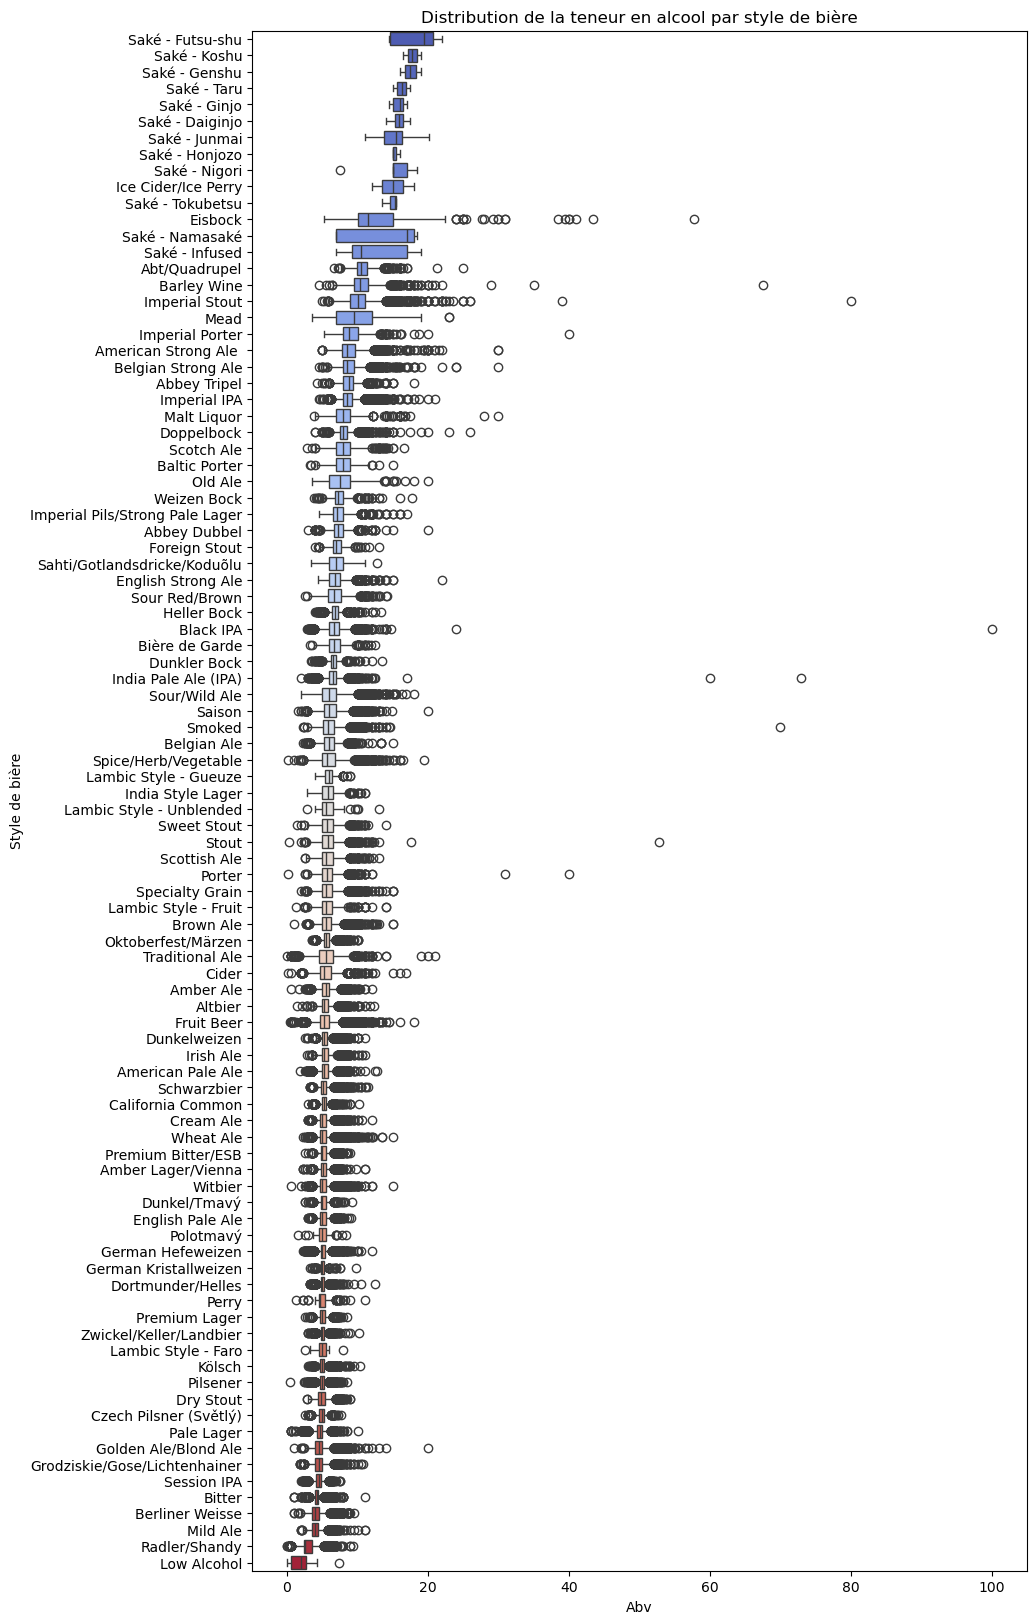

In [17]:
plt.figure(figsize= (10, 20))
sorted_styles = rb_beers.groupby('style')['abv'].mean().sort_values(ascending= False).index
sns.boxplot(data= rb_beers, x= 'abv', y= 'style', palette= 'coolwarm', order= sorted_styles)
plt.title('Distribution de la teneur en alcool par style de bière')
plt.xlabel('Abv')
plt.ylabel('Style de bière')
plt.show()

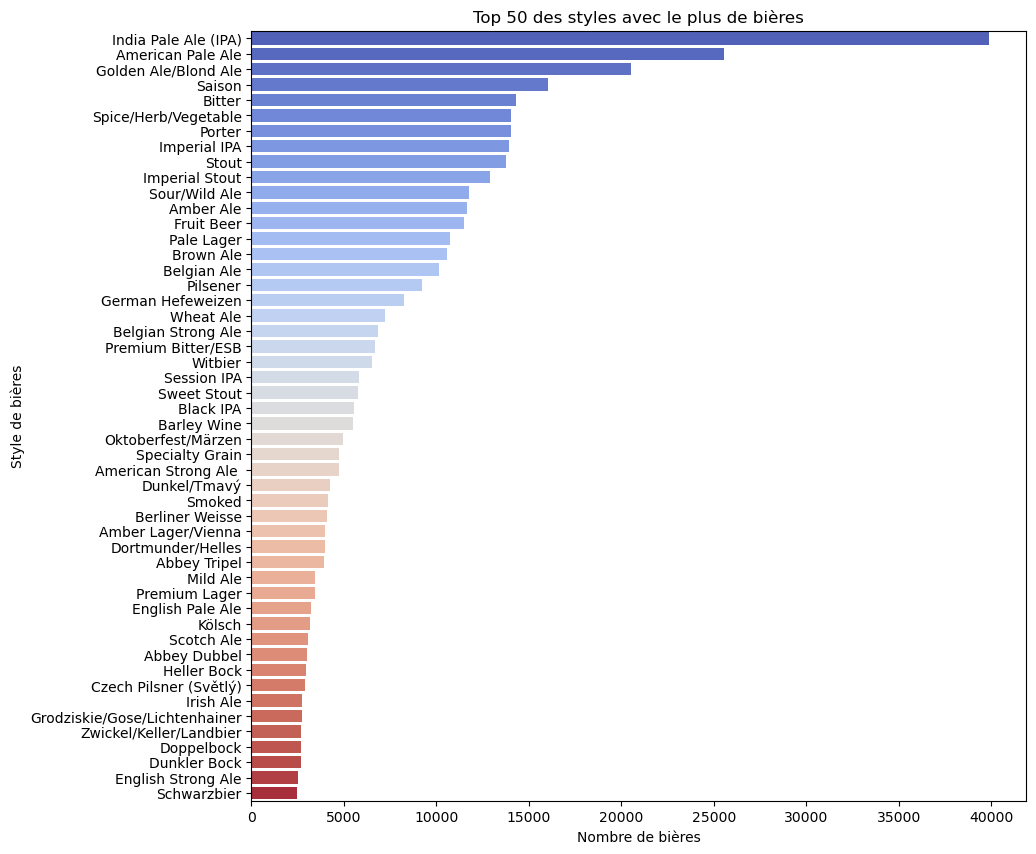

In [18]:
plt.figure(figsize= (10, 10))
top_50 = unique_style.sort_values(ascending= False, by= 'nbr_beers').head(50)
sns.barplot(data= top_50, x= 'nbr_beers', y= 'style', hue= 'style', palette= 'coolwarm')
plt.title('Top 50 des styles avec le plus de bières')
plt.xlabel('Nombre de bières')
plt.ylabel('Style de bières')
plt.show()

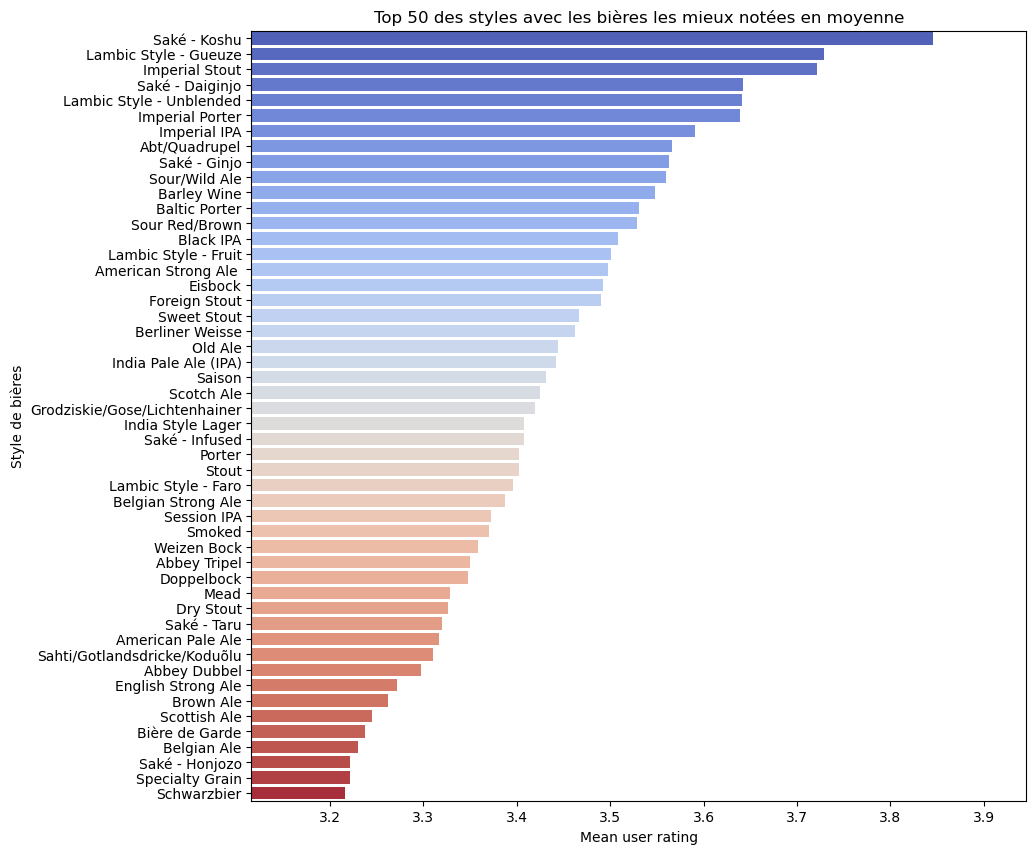

In [19]:
plt.figure(figsize= (10, 10))
top_50 = unique_style.sort_values(ascending= False, by= 'avg_computed_mean').head(50)
min_top_50 = min(top_50['avg_computed_mean'])
max_top_50 = max(top_50['avg_computed_mean'])
sns.barplot(data= top_50, x= 'avg_computed_mean', y= 'style', hue= 'style', palette= 'coolwarm')
plt.xlim(min_top_50 - 0.1, max_top_50 + 0.1)
plt.title('Top 50 des styles avec les bières les mieux notées en moyenne')
plt.xlabel('Mean user rating')
plt.ylabel('Style de bières')
plt.show()

## rb_breweries

id : Identifiant unique de chaque brasserie dans la base de données RateBeer.\
location : Emplacement géographique de la brasserie, incluant le pays ou la région.\
name : Nom de la brasserie.\
nbr_beers : Nombre de bières produites par cette brasserie, référencées dans la base de données.

Si je crée `unique_brewery` à partir `de rb_beers` j'ai moins de breweries que celle dans `rb_brewerie`s (i.e. `rb_breweries` comptabilise des brasseries en plsu, un exemple : `unique_brewery` n'a pas de brasserie sans bière)

Code pour voir : *display(rb_breweries[~rb_breweries['id'].isin(unique_brewery['brewery_id'])])*

Si on compare les *nbr_beers* entre `unique_brewey` et `rb_breweries`, parfois `rb_breweries` a plus de bières

In [20]:
display(rb_breweries.sort_values(by= 'id'))

,id,location,name,nbr_beers
13443,1,"United States, Louisiana",Abita Brewing Company,127
14881,2,"United States, Massachusetts",Peoples Pint,52
21936,3,England,Adnams,143
17947,4,"United States, Alaska",Alaskan Brewing Company,86
13284,5,"United States, Wisconsin",Appleton Brewing/Adler Brau,21
...,...,...,...,...
9767,32241,Brazil,Dark Side Brewery,1
14948,32242,"United States, New Jersey",Brooks Brewery,4
10028,32243,New Zealand,Bootleg Brewery Ltd,1
9146,32244,Belarus,Brauning Bier,3


In [21]:
unique_brewery = rb_beers.groupby('brewery_id').agg(nbr_beers= ('beer_id', 'count'),
                                             nbr_ratings_sum= ('nbr_ratings', 'sum'),
                                             nbr_ratings_mean= ('nbr_ratings', 'mean'),
                                             overall_score_mean= ('overall_score', 'mean'),
                                             style_score_mean= ('style_score', 'mean'),
                                             avg_mean= ('avg', 'mean'),
                                             abv_mean= ('abv', 'mean'),
                                             avg_computed_mean= ('avg_computed', 'mean')).reset_index()
display(unique_brewery)

,brewery_id,nbr_beers,nbr_ratings_sum,nbr_ratings_mean,overall_score_mean,style_score_mean,avg_mean,abv_mean,avg_computed_mean
0,1,127,12657,99.661417,53.937500,49.406250,3.059040,6.770421,3.242745
1,2,52,535,10.288462,51.400000,51.733333,3.013061,6.140909,3.233094
2,3,123,7834,63.691057,56.086957,61.228261,3.140000,4.939837,3.226938
3,4,86,10283,119.569767,78.585366,75.902439,3.224048,7.804868,3.480421
4,5,20,73,3.650000,31.000000,10.000000,2.861579,5.428571,2.917719
...,...,...,...,...,...,...,...,...,...
23194,32241,1,1,1.000000,NaN,NaN,3.190000,8.500000,4.200000
23195,32242,4,0,0.000000,NaN,NaN,NaN,5.675000,NaN
23196,32243,1,1,1.000000,NaN,NaN,3.020000,5.900000,3.400000
23197,32244,3,0,0.000000,NaN,NaN,NaN,4.533333,NaN


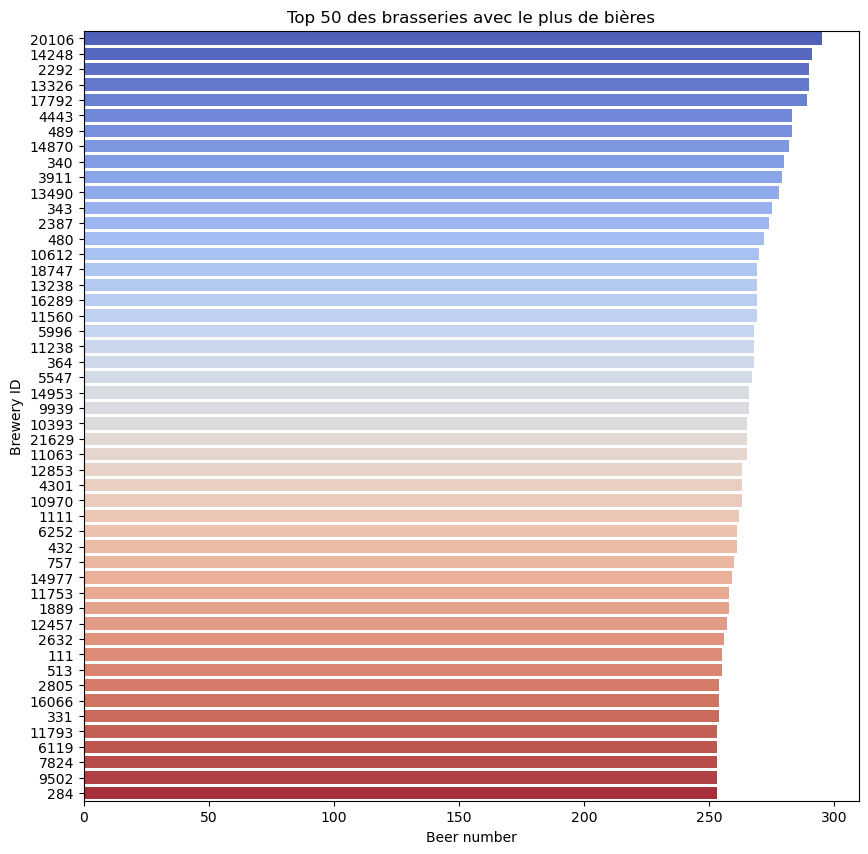

In [22]:
plt.figure(figsize= (10, 10))
top_50 = rb_breweries.sort_values(ascending= False, by= 'nbr_beers').head(50)
top_50['id'] = top_50['id'].astype(str)
sns.barplot(data= top_50, x= 'nbr_beers', y= 'id', hue= 'id', palette= 'coolwarm')
plt.title('Top 50 des brasseries avec le plus de bières')
plt.xlabel('Beer number')
plt.ylabel('Brewery ID')
plt.show()

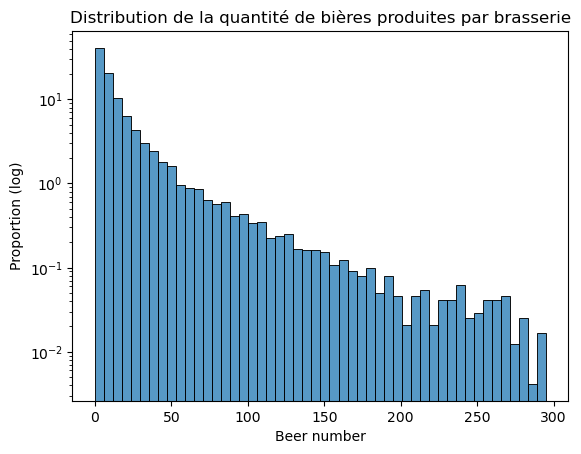

In [23]:
sns.histplot(rb_breweries['nbr_beers'], bins= 50, stat= 'percent')
plt.title('Distribution de la quantité de bières produites par brasserie')
plt.yscale('log')
plt.xlabel('Beer number')
plt.ylabel('Proportion (log)')
plt.show()

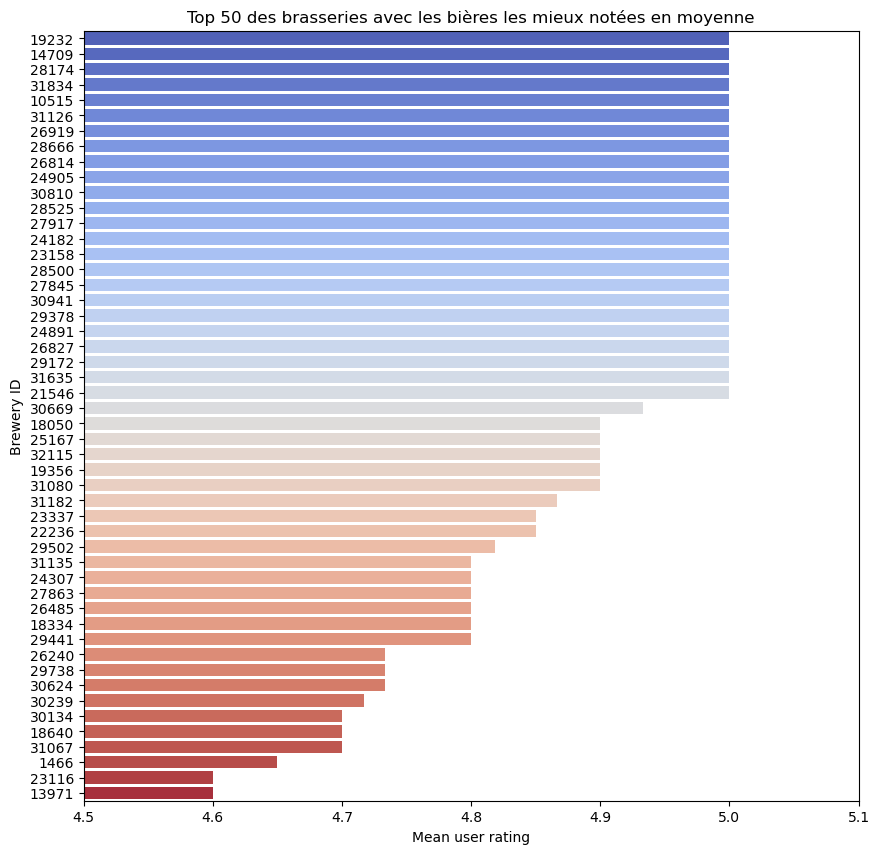

In [24]:
plt.figure(figsize= (10, 10))
top_50 = unique_brewery.sort_values(ascending= False, by= 'avg_computed_mean').head(50)
top_50['brewery_id'] = top_50['brewery_id'].astype(str)
min_top_50 = min(top_50['avg_computed_mean'])
max_top_50 = max(top_50['avg_computed_mean'])
sns.barplot(data= top_50, x= 'avg_computed_mean', y= 'brewery_id', hue= 'brewery_id', palette= 'coolwarm')
plt.xlim(min_top_50 - 0.1, max_top_50 + 0.1)
plt.title('Top 50 des brasseries avec les bières les mieux notées en moyenne')
plt.xlabel('Mean user rating')
plt.ylabel('Brewery ID')
plt.show()

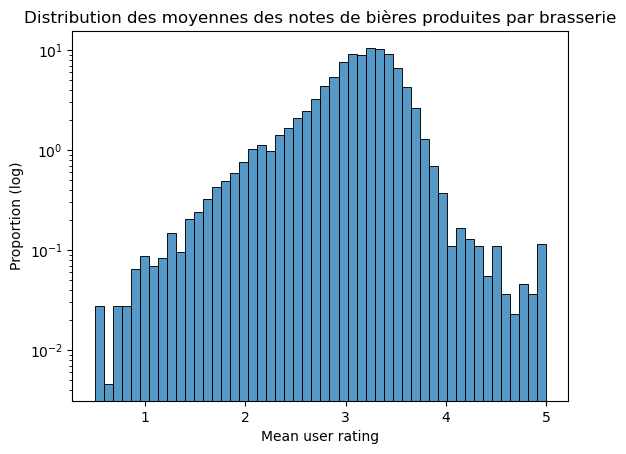

In [25]:
sns.histplot(unique_brewery['avg_computed_mean'], bins= 50, stat= 'percent')
plt.title('Distribution des moyennes des notes de bières produites par brasserie')
plt.yscale('log')
plt.xlabel('Mean user rating')
plt.ylabel('Proportion (log)')
plt.show()

## rb_users

## rb_reviews

In [26]:
rb_reviews

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,26/04/2016,Manslow,175852,2,4,2,4,8,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,17/02/2017,MAGICuenca91,442761,2,3,2,4,8,1.9,Cerveza pale lager gabonesa. MÃ¡s floja que la...
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,24/06/2016,Sibarh,288889,3,3,2,3,5,1.6,"Kolor- złoty, klarowny. Piana - drobna, średni..."
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,01/01/2016,fombe89,250510,4,3,1,2,5,1.5,"Botella, de GabÃ³n regalo familiar.31/01/2015C..."
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,23/10/2015,kevnic2008,122778,2,4,2,4,7,1.9,Many thanks for this beer to Erzengel. Pours l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Amoy Bräu Black Moon 11%,335427,FatFat Beer Horse 胖胖啤酒马,21107,Imperial Stout,11.0,06/05/2016,GuideDogSaint,53015,4,8,4,8,15,3.9,On tap at Daxue Lu on 18 Nov 2015. Pours black...
9996,Amoy Bräu Cascade Pale Ale,293141,FatFat Beer Horse 胖胖啤酒马,21107,American Pale Ale,6.0,14/10/2014,GuideDogSaint,53015,3,6,3,6,12,3.0,On tap at the brew house on 11 Oct. Pours hazy...
9997,Amoy Bräu Citra Pale Ale,339181,FatFat Beer Horse 胖胖啤酒马,21107,American Pale Ale,6.5,08/06/2015,GuideDogSaint,53015,4,7,4,8,14,3.7,On tap at the Daxue Lu bar on 3 June. Pours ha...
9998,Amoy Bräu East Kent Goldings Pale Ale,313857,FatFat Beer Horse 胖胖啤酒马,21107,American Pale Ale,6.5,07/02/2015,GuideDogSaint,53015,4,7,4,7,14,3.6,"On tap at Amoy Brau, ZCA. Pours hazy golden wi..."


In [27]:
unique_beer = rb_reviews.groupby('beer_name').agg(number_beers= ('beer_id', 'count'),
                                             rating_mean= ('rating', 'mean'),
                                             number_beer= ('beer_id', 'count'))
unique_beer = unique_beer.reset_index()
display(unique_beer.sort_values(by= 'beer_name').head(20))
display(rb_beers[rb_beers['beer_name'].isin(unique_beer['beer_name'])].sort_values(by= 'beer_name').head(20))

,beer_name,number_beers,rating_mean,number_beer
0,1925 BLK 622,6,2.966667,6
1,1925 Da Bai,2,3.150000,2
2,1925 Mango IPA,1,3.300000,1
3,1925 Manuka Stout,1,3.600000,1
4,1925 The General,3,3.100000,3
5,1925 The Yellow Van,8,3.212500,8
6,21 Jag Hops Typhoon,1,2.800000,1
7,33 Export (Gabon),1,2.000000,1
8,ABC Extra Stout,200,3.248000,200
9,ABC Extra Stout Ginseng,10,2.000000,10


,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
517,308489,1925 BLK 622,21778,The 1925 Microbrewery & Restaurant,Amber Ale,6,NaN,NaN,2.95,5.60,2.966667,NaN,0,NaN
518,529494,1925 Da Bai,21778,The 1925 Microbrewery & Restaurant,India Style Lager,2,NaN,NaN,3.00,4.80,3.150000,NaN,0,NaN
519,529498,1925 Mango IPA,21778,The 1925 Microbrewery & Restaurant,India Pale Ale (IPA),1,NaN,NaN,3.00,5.25,3.300000,NaN,0,NaN
520,308488,1925 Manuka Stout,21778,The 1925 Microbrewery & Restaurant,Stout,1,NaN,NaN,3.06,6.80,3.600000,0.170470,1,3.6000
522,457013,1925 The General,21778,The 1925 Microbrewery & Restaurant,Spice/Herb/Vegetable,3,NaN,NaN,3.00,2.80,3.100000,NaN,0,NaN
523,308486,1925 The Yellow Van,21778,The 1925 Microbrewery & Restaurant,English Pale Ale,8,NaN,NaN,3.12,4.50,3.212500,-0.493881,8,3.2125
547,522638,21 Jag Hops Typhoon,31691,21 Jag,American Pale Ale,1,NaN,NaN,2.89,5.00,2.800000,NaN,0,NaN
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.00,2.000000,NaN,0,NaN
500,9226,ABC Extra Stout,547,Singapore Brewery (Asia Pacific Breweries-Hein...,Foreign Stout,200,55.0,30.0,3.24,7.00,3.248000,NaN,0,NaN
501,71317,ABC Extra Stout Ginseng,547,Singapore Brewery (Asia Pacific Breweries-Hein...,Foreign Stout,10,10.0,1.0,2.29,8.00,2.000000,NaN,0,NaN
